In [2]:
%matplotlib inline
%qtconsole

import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap

from datetime import datetime, timedelta
from scipy import stats

import xarray as xr

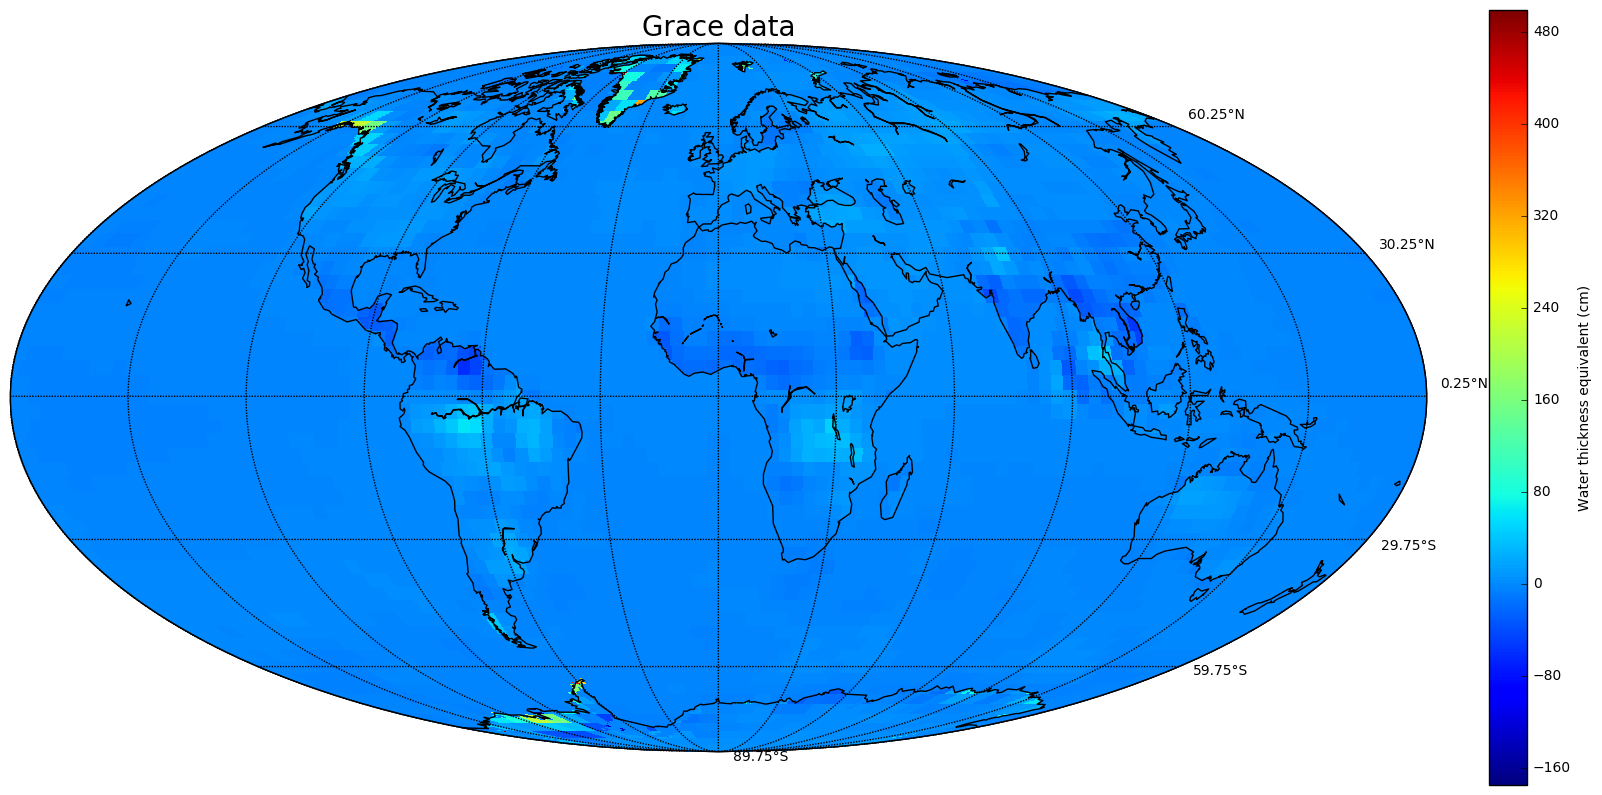

In [3]:
#url = 'http://opendap.jpl.nasa.gov:80/opendap/GeodeticsGravity/tellus/L3/land_mass/RL05/netcdf/GRCTellus.JPL.200204_201607.LND.RL05_1.DSTvSCS1411.nc'
nc = 'http://opendap.jpl.nasa.gov:80/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201606.GLO.RL05M_1.MSCNv02CRIv02.nc'
data = xr.open_dataset(nc)
rmap = data['lwe_thickness'][0,:,:]

# Extract Lat/Lon Metadata
lat_min = data.geospatial_lat_min
lat_max = data.geospatial_lat_max
lat_res = float(data.geospatial_lat_resolution[0:3])

lon_min = data.geospatial_lon_min
lon_max = data.geospatial_lon_max
lon_res = float(data.geospatial_lon_resolution[0:3])

# Build grid
lon_g = np.arange(lon_min,lon_max+lon_res,lon_res)
lat_g = np.arange(lat_min,lat_max+lat_res,lat_res)
x,y = np.meshgrid(lon_g[:], lat_g[:])

# Plot Fig
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw parallels and meridians.
parallels = np.arange(-89.75,89.75,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',latlon=True);
im2 = m.pcolormesh(x,y,masked_array,shading='flat',latlon=True)
m.drawcoastlines();
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Water thickness equivalent (cm)')
plt.title('Grace data',size=20)


In [8]:
# use pd.read_csv to read in the csv data
csv = 'https://www.hydroshare.org/django_irods/download/d3659dcf575d4090801a74d1ce096d7c/data/contents/WPDx_Well_Function_Upd_151224_xy161117.csv'
wells = pd.read_csv(csv)
wells

# Make a map with some property scattered over

,WELL_ID,LAT_DD,LONG_DD,FUNC,STATUS,COD_FCN,COD_QTY,COD_RESRCE,ADM1,ADM2,ACTIVITY,COUNTRY,WATERSRC,WATERTECH,INSTALLED,MGMT,PAY,SOURCE,RPT_DATE
0,362092,5.982436,-8.180609,Yes,Working but with problems. Well polluted|Under...,2,1,0,Grand Gedeh,Tchien,zmbpw,LR,Manual pump on hand-dug well,Vergnet,0,NaN,No water committee,WASH Liberia,21/01/2011
1,362100,5.899207,-8.173315,Yes,Working but with problems. Well polluted|Under...,2,1,0,Grand Gedeh,Tchien,z4ja5,LR,Manual pump on hand-dug well,Vergnet,1986,NaN,No water committee,WASH Liberia,21/01/2011
2,357349,5.802157,-9.645714,Yes,Working but with problems. Not priming,2,1,0,Rivercess,Norwein,yjryl,LR,Manual pump on hand-dug well,Afridev,2008,NaN,No water committee,WASH Liberia,02/02/2011
3,489514,-0.541100,34.375820,No,Drought|No operation in the dry season,999,0,1,Homa Bay,Mbita,Yao Oinga,KE,NaN,Surface water,0,0,No payment system,Engineering Sciences & Global Development,24/01/2011
4,357595,5.716055,-9.618187,No,Broken Down System. low water table,0,1,1,Rivercess,Norwein,y1ccy,LR,Manual pump on hand-dug well,Afridev,2005,NaN,No water committee,WASH Liberia,03/02/2011
5,489266,-0.730000,34.366000,No,No fuel|No operation at least once a week,2,1,0,Homa Bay,Ndhiwa,Water Kiosk,KE,NaN,Gravity-fed communal standpipe,1995,Private Operator/Delegated Management,Per Bucket,Engineering Sciences & Global Development,18/02/2011
6,489625,-0.450333,34.009880,No,Low yield|No operation in the dry season,2,1,1,Homa Bay,Mbita,Wakula Dispensary BH,KE,NaN,Borehole with hand pump,0,Institutional Management,No payment system,Engineering Sciences & Global Development,02/10/2011
7,364570,5.231378,-9.141873,Yes,Working but with problems. Well polluted|Under...,2,1,0,Sinoe,Sanquin Dist#2,v5dph,LR,Manual pump on hand-dug well,Afridev,2010,Community Management,Yes but only in case of breakdown,WASH Liberia,27/01/2011
8,361779,5.225134,-8.121493,Yes,Working but with problems. insufficient water,2,1,0,River Gee,Karforh,v42mh,LR,Manual pump on hand-dug well,Afridev,2009,NaN,No water committee,WASH Liberia,18/02/2011
9,361780,5.225422,-8.119787,Yes,Working but with problems. insufficient water,2,1,0,River Gee,Karforh,v42mf,LR,Manual pump on hand-dug well,Afridev,2009,NaN,No water committee,WASH Liberia,18/02/2011


In [12]:
# 1. Code that subselects regions of interest. This is for all of Africa, but could be used later to get individual time series

data = xr.open_dataset('http://opendap.jpl.nasa.gov:80/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201606.GLO.RL05M_1.MSCNv02CRIv02.nc')

af = xr.concat( [data['lwe_thickness'].isel(time=0).sel(lat=slice(-37.75,37.75)).sel(lon=slice(340.25,359.75)),
                  data['lwe_thickness'].isel(time=0).sel(lat=slice(-37.75,37.75)).sel(lon=slice(0.25,50.75))],
                  dim='lon')

af.shape

#test = #data['lwe_thickness'].isel(time=0).sel(lat=slice(-37.75,37.75)).sel(lon=slice(340.25,359.75)).sel(lon=slice(0.25,50.75))

#mask = data['lwe_thickness'].any(lat==slice(-37.75,37.75))
#lonAF = data['lon'].sel(lon=slice(340.25,359.75)).sel(lon=slice(0.25,50.75))

#lonAF = data['lon']
lonaf = xr.concat( [data['lon'].sel(lon=slice(340.25,359.75)),
                  data['lon'].sel(lon=slice(0.25,50.75))],
                  dim='lon')

lataf = data['lat'].sel(lat=slice(-37.75,37.75))
#lonAF = data['lon'].sel(lon=slice(-18.75,50.75))
#roll?

In [5]:
# Find nearest grid locations for all data
# lon_g and lat_g are the lons and lats of the gridded products, respectively

lon_g = lonAF
lat_g = latAF

# Define grid box centers
lon_c = lon_g[:-1]+xRes/2
lat_c = lat_g[:-1]+yRes/2

# Define a new metadata file that has grid coordinates for this resolution choice
wg = wells;

wg.loc[:,'grid_lat'] = np.nan
wg.loc[:,'grid_lon'] = np.nan

## Determine grid_lat and grid_lon for every record

for index, row in wg.iterrows():
    lon_s = row['LON_DD']
    lat_s = row['LAT_DD']
    lat_ind = np.digitize(lat_s,lat_g,right=True)
    lon_ind = np.digitize(lon_s,lon_g,right=True)
    wg.set_value(index,'lat_ind',lat_ind-1)
    wg.set_value(index,'lon_ind',lon_ind-1)

NameError: name 'lonAF' is not defined